# Pixel Search Algorithm in use

In [34]:
# Defining algorithm
import torch
import cv2 
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Optional: for reading images


def refine_keypoint(image, keypoint, x_true, y_true, x_guess, y_guess, window_size=11):
    """
    Refines the keypoint by searching for the brightest pixel in a local window.
    
    Args:
        image (numpy.ndarray): The grayscale input image.
        keypoint (tuple): Initial keypoint coordinates (x, y).
        window_size (int): The size of the search window (must be odd).
    
    Returns:
        tuple: Refined keypoint (x, y).
    """
    x, y = int(keypoint[0]), int(keypoint[1])
    half_w = window_size // 2

    # Extract search region (ensure it stays within image bounds)
    y_min, y_max = max(0, y - half_w), min(image.shape[0], y + half_w + 1)
    x_min, x_max = max(0, x - half_w), min(image.shape[1], x + half_w + 1)
    
    search_region = image[y_min:y_max, x_min:x_max]
    
    # Find non-black pixels
    non_black_pixels = np.argwhere(search_region > 0)  # Get (y, x) positions of non-black pixels
    #print(non_black_pixels)
    if len(non_black_pixels) == 0:
        return keypoint  # No valid pixels, return original keypoint

    # Sort pixels by height (smallest y first) and brightness (highest value)
    sorted_pixels = sorted(non_black_pixels, key=lambda p: (p[0]))
    #print(sorted_pixels)

    # Choose the highest (smallest y) and brightest pixel
    highest_pixel = sorted_pixels[0]
    refined_y_local, refined_x_local = highest_pixel  # Local coordinates
    refined_x = x_min + refined_x_local
    refined_y = y_min + refined_y_local

    print("Refined_pixel_value:", image[int(refined_y),int(refined_x)])
    print("True pixel value:", image[int(y_true), int(x_true)])


    # Load an image
    image_open = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Plot image
    fig, ax = plt.subplots(figsize=(25, 25))

    ax.imshow(image_open)  # Display the image
    # Plot points
    ax.plot(x_min, y_min, "bo", markersize="2")  # Red circle
    ax.plot(x_max, y_max, "bo", markersize="2")  # Blue X
    ax.plot(x_true, y_true, "go", markersize="2") 
    ax.plot(x_guess, y_guess, "rx", markersize="2")
    ax.plot(refined_x, refined_y, "ro", markersize="2")
    ax.axis("off")  # Hide axes
    ax.set_aspect("equal")
    plt.show()


    return refined_x, refined_y

# Example usage
'''image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Load grayscale image
initial_keypoint = (150, 120)  # Example initial keypoint from model
refined_keypoint = refine_keypoint(image, initial_keypoint)

print("Initial:", initial_keypoint)
print("Refined:", refined_keypoint)'''

'image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Load grayscale image\ninitial_keypoint = (150, 120)  # Example initial keypoint from model\nrefined_keypoint = refine_keypoint(image, initial_keypoint)\n\nprint("Initial:", initial_keypoint)\nprint("Refined:", refined_keypoint)'

In [35]:
import pandas
df = pandas.read_csv("/Users/casperbakolesen/Desktop/Github/Dataprojekt/Kode/SDU Cloud/final_results_with_distance.csv")

Refined_pixel_value: 102
True pixel value: 153


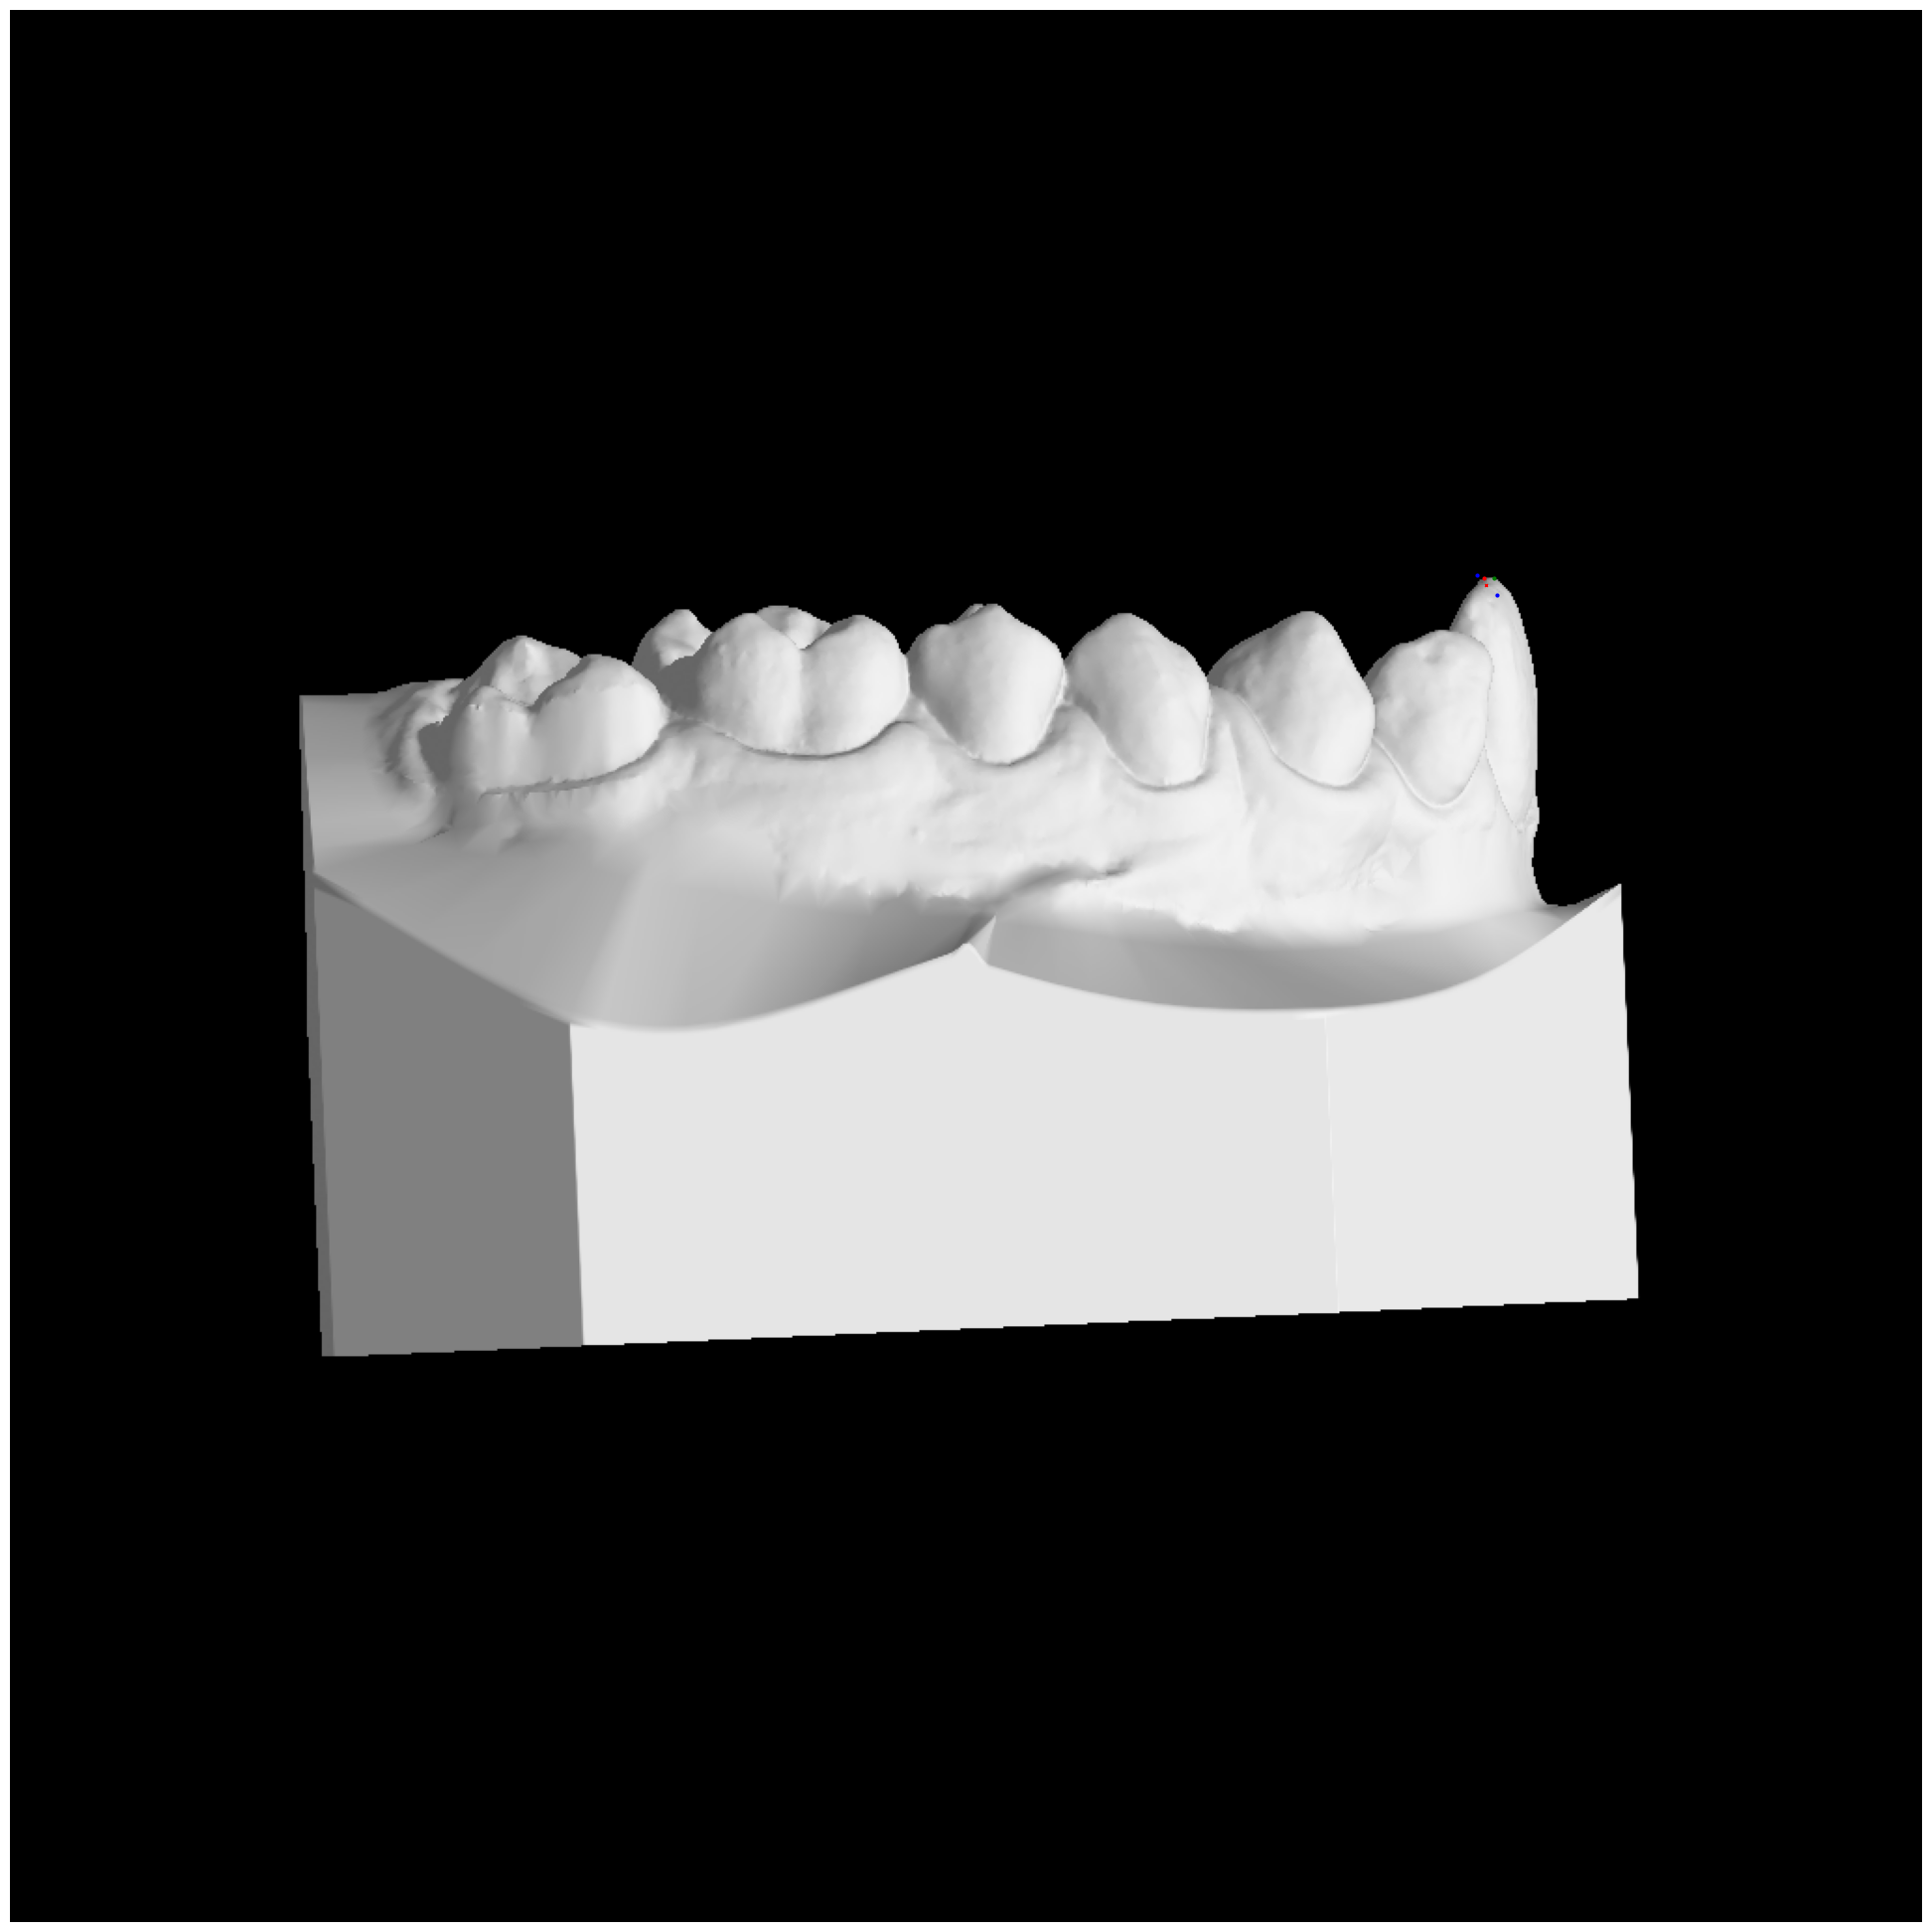

Initial: (790.0089111328125, 307.6592712402344)
Refined: (789, 304)
True (794.0, 304.0)


In [36]:
image1 = cv2.imread(f"/Users/casperbakolesen/Desktop/Github/Dataprojekt/Data/Clean Data/Overbite Data/Annotated Verification Data/{df["Filename"][25]}.png", cv2.IMREAD_GRAYSCALE)
keypoint1 = df["X_Model"][25], df["Y_Model"][25]
true_keypoint1 = df["X_True"][25], df["Y_True"][25]
guess_x, guess_y = keypoint1
true_x, true_y = true_keypoint1
refined_keypoint1 = refine_keypoint(image1, keypoint1, true_x, true_y, guess_x, guess_y, window_size=10)
print("Initial:", keypoint1)
print("Refined:", refined_keypoint1)
print("True", true_keypoint1)

Initial: (790.0089111328125, 307.6592712402344)
Refined: (789, 304)
True (794.0, 304.0)
Initial punktet er længere nede i billedet end de andre to billeder og længere til højre for refined, men længere til venstre for true. Når man skal indiksere i billedmatricen, så bytter man plads på de to.

In [50]:
# Eksempel
image1[304, 794]

153